In [1]:
#Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Read Productivity_Data (1).csv Dataset
df=pd.read_csv("C:/Users/Gagan-PC/Downloads/Productivity_Data (1).csv")
df.head()

,CONTINENT,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Labour Productivity Value,Labour Compensation Value,Multifactor Productivity Value,G20 Country? Yes/No
0,Australia,AUS,TOT,IDX2010_1,A,1964,0.474818,NaN,NaN,Yes
1,Australia,AUS,TOT,IDX2010_1,A,1965,0.472183,NaN,NaN,Yes
2,Australia,AUS,TOT,IDX2010_1,A,1966,0.477849,NaN,NaN,Yes
3,Australia,AUS,TOT,IDX2010_1,A,1967,0.499847,NaN,NaN,Yes
4,Australia,AUS,TOT,IDX2010_1,A,1968,0.513978,NaN,NaN,Yes


In [3]:
#Droped rows containing Null/NaN values
df1=df.dropna()

In [4]:
#Have a look at new dataframe df1
df1.head()

,CONTINENT,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME,Labour Productivity Value,Labour Compensation Value,Multifactor Productivity Value,G20 Country? Yes/No
21,Australia,AUS,TOT,IDX2010_1,A,1985,0.683785,33.650663,86.660364,Yes
22,Australia,AUS,TOT,IDX2010_1,A,1986,0.668750,35.388076,86.022618,Yes
23,Australia,AUS,TOT,IDX2010_1,A,1987,0.688913,37.480844,87.402699,Yes
24,Australia,AUS,TOT,IDX2010_1,A,1988,0.693306,40.202820,86.87658,Yes
25,Australia,AUS,TOT,IDX2010_1,A,1989,0.693032,42.605293,86.685453,Yes


In [5]:
#Converted values of column 'Multifactor Productivity Value' into numeric to conduct further analysis 
df1['Multifactor Productivity Value']=pd.to_numeric(df1['Multifactor Productivity Value'])

C:\Users\Gagan-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
#Created slices of datafram for each country 
#North America 
us=(df1.loc[df1['LOCATION'].isin(['USA'])])
ca=(df1.loc[df1['LOCATION'].isin(['CAN'])])

#Asia
jap=(df1.loc[df1['LOCATION'].isin(['JPN'])])
kor=(df1.loc[df1['LOCATION'].isin(['KOR'])])

#Australia
aus=(df1.loc[df1['LOCATION'].isin(['AUS'])])
nzl=(df1.loc[df1['LOCATION'].isin(['NZL'])])

#South America
# available data is not consistent to perform analysis 

#Europe
aut=(df1.loc[df1['LOCATION'].isin(['AUT'])]) #Austria
bel=(df1.loc[df1['LOCATION'].isin(['BEL'])]) #Belgium
dnk=(df1.loc[df1['LOCATION'].isin(['DNK'])]) #Denmark
fin=(df1.loc[df1['LOCATION'].isin(['FIN'])]) #Finland
fra=(df1.loc[df1['LOCATION'].isin(['FRA'])]) #France
deu=(df1.loc[df1['LOCATION'].isin(['DEU'])]) #Germany
grc=(df1.loc[df1['LOCATION'].isin(['GRC'])]) #Greece
irl=(df1.loc[df1['LOCATION'].isin(['IRL'])]) #Ireland*
ita=(df1.loc[df1['LOCATION'].isin(['ITA'])]) #Italy
lux=(df1.loc[df1['LOCATION'].isin(['LUX'])]) #Luxembourg
nld=(df1.loc[df1['LOCATION'].isin(['NLD'])]) #Netherlands
nor=(df1.loc[df1['LOCATION'].isin(['NOR'])]) #Norway
prt=(df1.loc[df1['LOCATION'].isin(['PRT'])]) #Portugal*
esp=(df1.loc[df1['LOCATION'].isin(['ESP'])]) #Spain
swe=(df1.loc[df1['LOCATION'].isin(['SWE'])]) #Sweden
che=(df1.loc[df1['LOCATION'].isin(['CHE'])]) #Switzerland
gbr=(df1.loc[df1['LOCATION'].isin(['GBR'])]) #Great Britain



Hypothesis 1: There is a strong positive correlation between labour compensation and productivity. High productive nations have higher labour compensation.


In [7]:
#Created a new dataframe df2 which contains only two columns for a scatter plot.
df2=df1.drop(['CONTINENT', 'LOCATION', 'SUBJECT','MEASURE','FREQUENCY','Labour Productivity Value','G20 Country? Yes/No','TIME'], axis=1) #Drop unused columns for scatter plot matrix 
df2.head()

,Labour Compensation Value,Multifactor Productivity Value
21,33.650663,86.660364
22,35.388076,86.022618
23,37.480844,87.402699
24,40.202820,86.876580
25,42.605293,86.685453


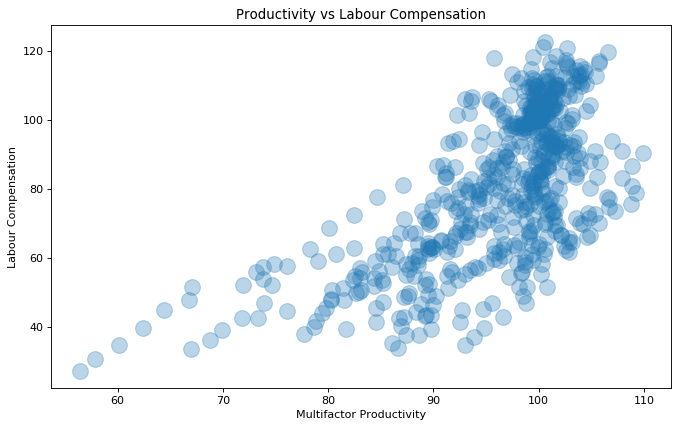

In [8]:
#Scatter plot to answer first Hypothesis

plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df2['Multifactor Productivity Value'], df2['Labour Compensation Value'],marker='o',alpha=0.3, s=200,)
plt.xlabel('Multifactor Productivity')
plt.ylabel('Labour Compensation')
plt.title('Productivity vs Labour Compensation')
plt.savefig('Scatter.png')
plt.show()


In [9]:
#calulate correlation between Multifactor Productivity Value and Labour Compensation Value.
df2.corr() #correlation coefficient


,Labour Compensation Value,Multifactor Productivity Value
Labour Compensation Value,1.00000,0.66629
Multifactor Productivity Value,0.66629,1.00000


In [10]:
df2.corr()['Multifactor Productivity Value'].sort_values(ascending=False)

Multifactor Productivity Value    1.00000
Labour Compensation Value         0.66629
Name: Multifactor Productivity Value, dtype: float64

In [11]:
#Conclusion: there is a positive correlation between "Multifactor Productivity" and "Labour Compensation"

Hypothesis 2: Asia is expected to have high productivity and low labour compensation.

Hypothesis 3: Japan is the country with the optimal level of productivity in Asia.


In [ ]:
#In order to answer Hypothesis 2 and 3,we have produced lineplots of Multifactor Productivity Value' and 'Labour Compensation Value from 1985 to 2017 for each country in evey continent.

<Figure size 432x288 with 0 Axes>

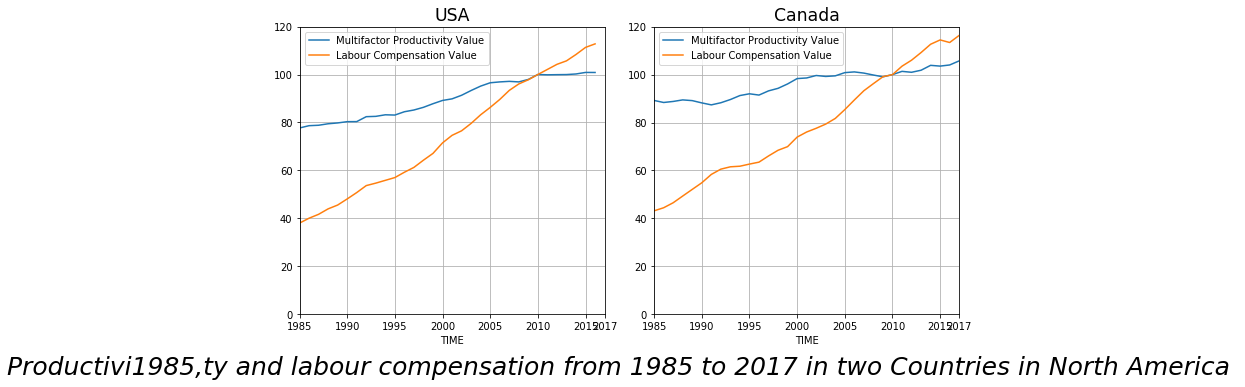

In [12]:

#North America 
fig = plt.figure()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1]

x=0
Countries = ["USA","Canada"]

for frame in [us,ca]:
    frame.plot(x='TIME',y=['Multifactor Productivity Value','Labour Compensation Value'], ax=axs[x], legend=True, grid=True)
    axs[x].set_title(Countries[x], fontsize='xx-large')
    axs[x].set_xticks([1985,1990,1995,2000,2005,2010,2015,2017])
    axs[x].set_yticks([0,20,40,60,80,100,120])
    
    plt.tight_layout()
    x=x+1
plt.suptitle("Productivi1985,ty and labour compensation from 1985 to 2017 in two Countries in North America ", fontsize=25, fontweight=0, color='black', style='italic', y=0)
plt.savefig('North america.png')
plt.show()


<Figure size 432x288 with 0 Axes>

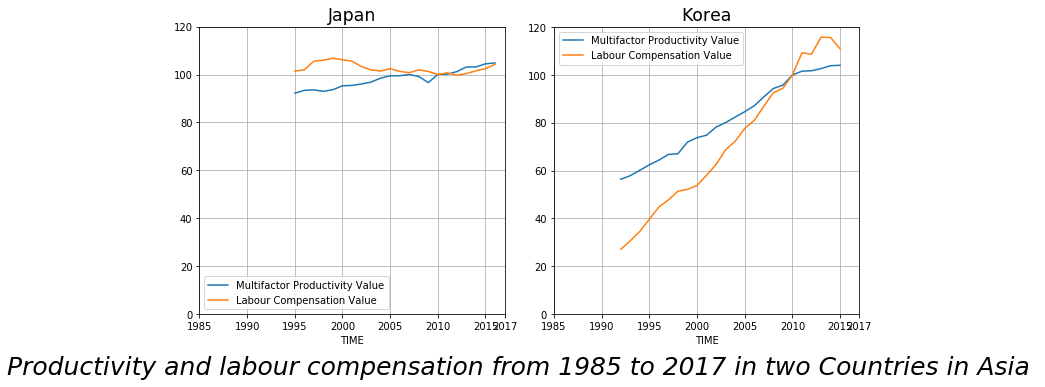

In [13]:
#Asia

fig = plt.figure()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1]

x=0
Countries = ["Japan","Korea"]

for frame in [jap,kor]:
    frame.plot(x='TIME',y=['Multifactor Productivity Value','Labour Compensation Value'], ax=axs[x], legend=True, grid=True)
    axs[x].set_title(Countries[x], fontsize='xx-large')
    axs[x].set_xticks([1985,1990,1995,2000,2005,2010,2015,2017])
    axs[x].set_yticks([0,20,40,60,80,100,120])
    plt.tight_layout()
    x=x+1
plt.suptitle("Productivity and labour compensation from 1985 to 2017 in two Countries in Asia ", fontsize=25, fontweight=0, color='black', style='italic', y=0)
plt.savefig('Asia.png')
plt.show()


<Figure size 432x288 with 0 Axes>

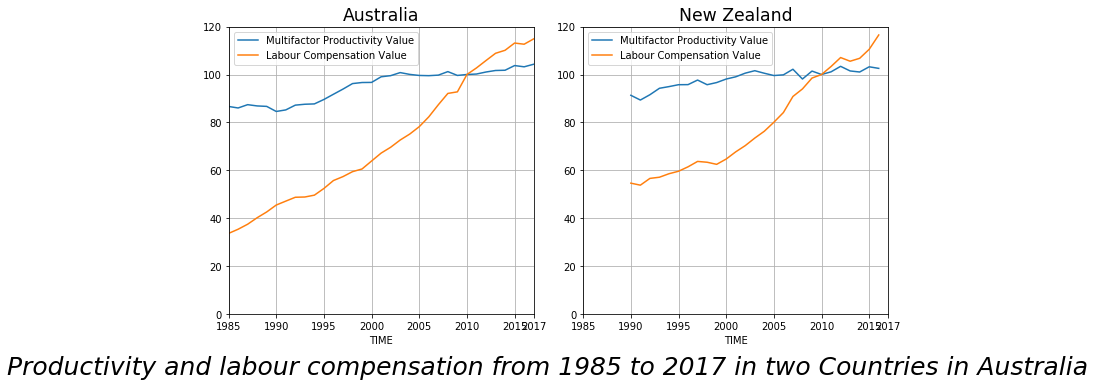

In [14]:
#Australia

fig = plt.figure()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1]

x=0
Countries = ["Australia","New Zealand"]

for frame in [aus,nzl]:
    frame.plot(x='TIME',y=['Multifactor Productivity Value','Labour Compensation Value'], ax=axs[x], legend=True, grid=True)
    axs[x].set_title(Countries[x], fontsize='xx-large')
    axs[x].set_xticks([1985,1990,1995,2000,2005,2010,2015,2017])
    axs[x].set_yticks([0,20,40,60,80,100,120])
    plt.tight_layout()
    x=x+1
plt.suptitle("Productivity and labour compensation from 1985 to 2017 in two Countries in Australia ", fontsize=25, fontweight=0, color='black', style='italic', y=0)
plt.savefig('Australia.png')
plt.show()


<Figure size 432x288 with 0 Axes>

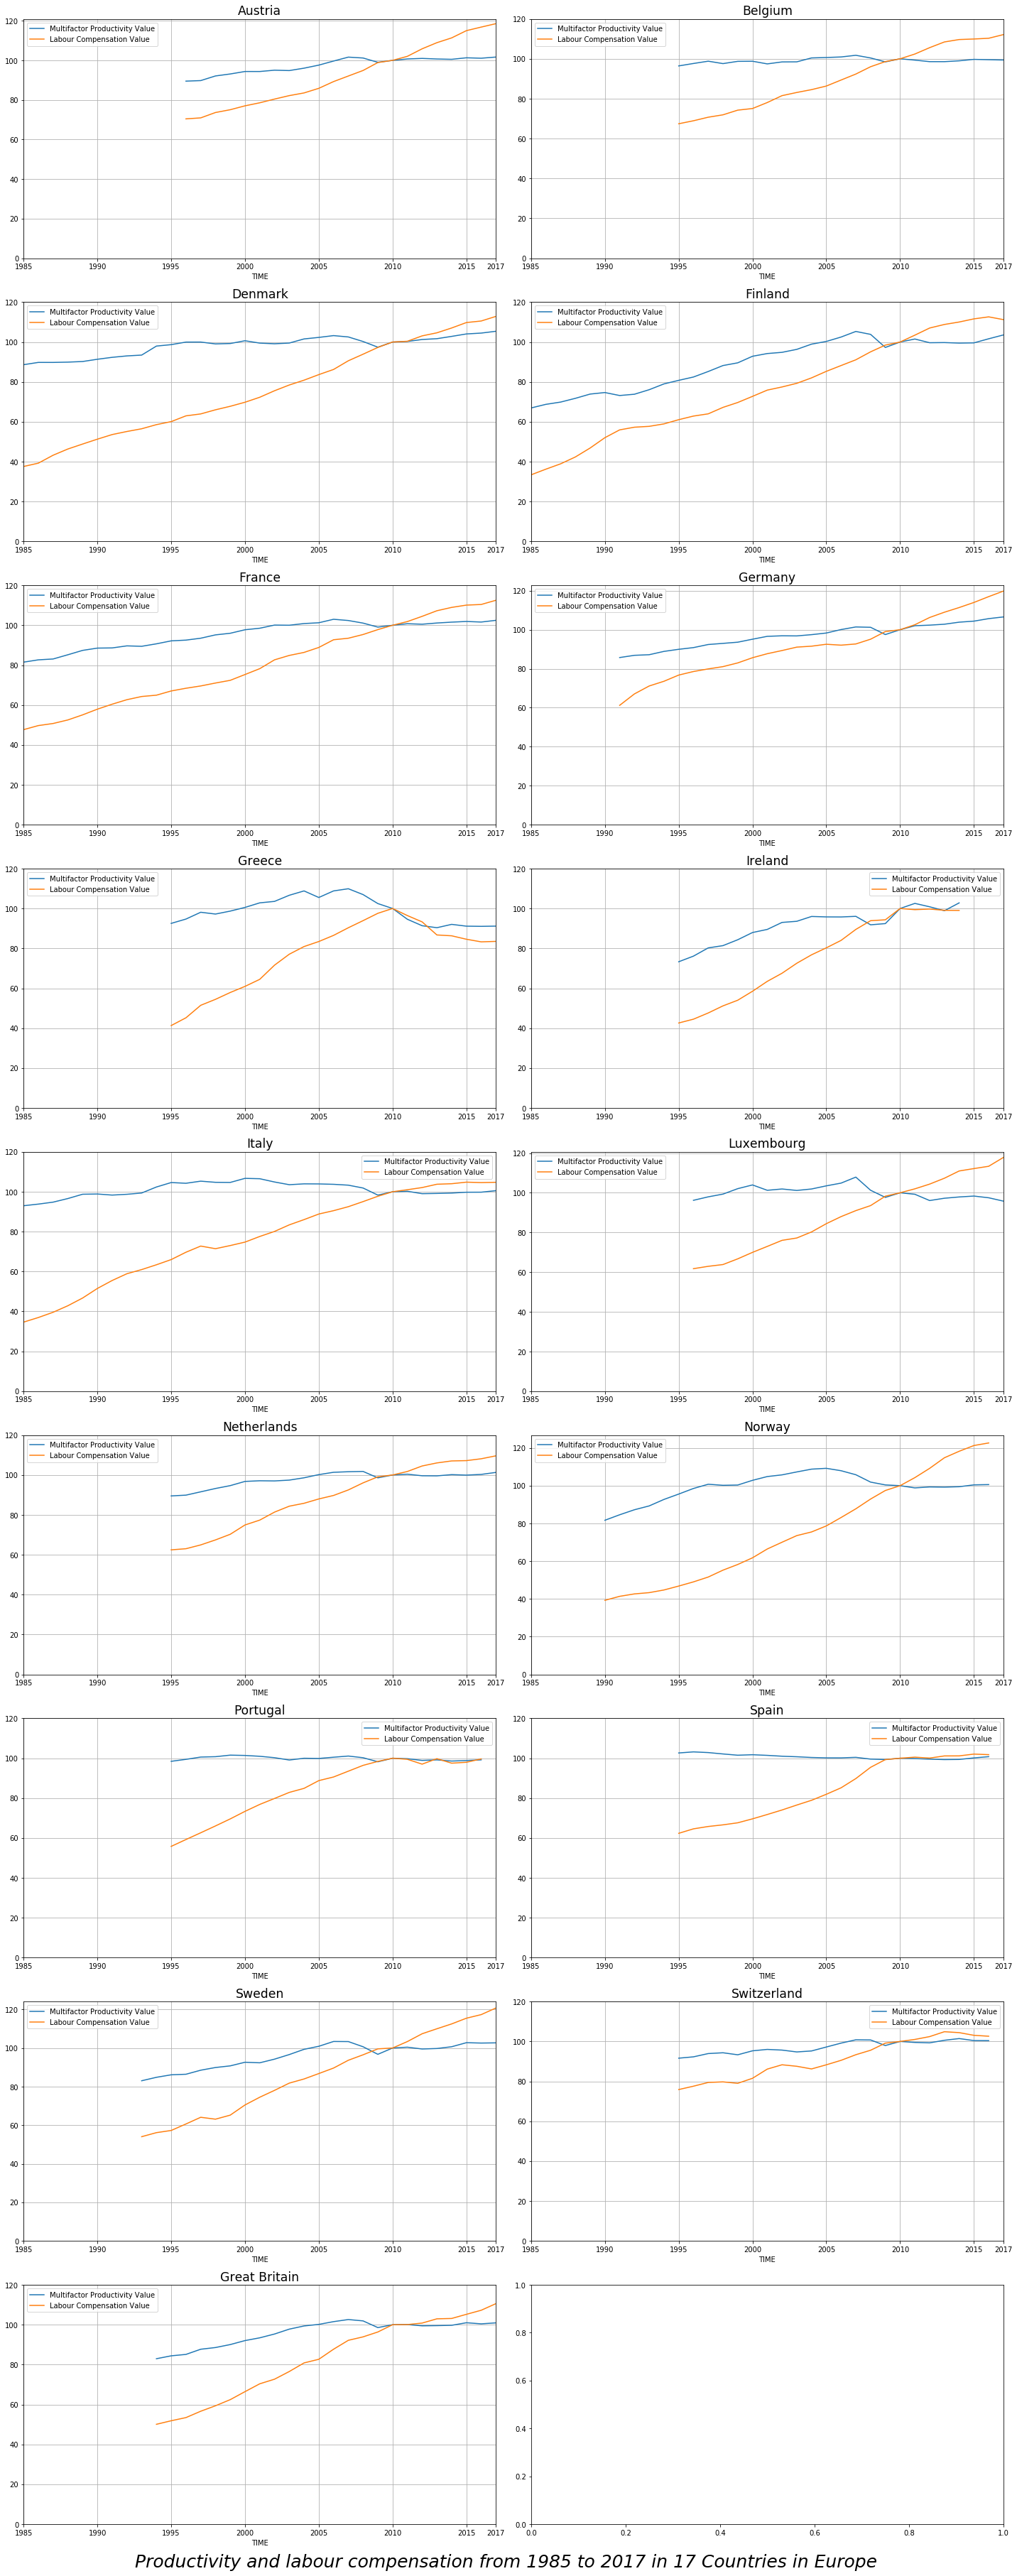

In [15]:
#Europe
fig = plt.figure()

fig, axs = plt.subplots(9, 2, figsize=(20, 50))
x=0
y=0
z=0
Countries = ["Austria","Belgium","Denmark","Finland","France","Germany","Greece","Ireland","Italy","Luxembourg","Netherlands","Norway","Portugal","Spain","Sweden","Switzerland","Great Britain"]

for frame in [aut,bel,dnk,fin,fra,deu,grc,irl,ita,lux,nld,nor,prt,esp,swe,che,gbr]:
    frame.plot(x='TIME',y=['Multifactor Productivity Value','Labour Compensation Value'], ax=axs[x,y], legend=True, grid=True)
    #axs[x,y].set_xlabel(Countries[z], fontsize='xx-large')
    axs[x,y].set_title(Countries[z], fontsize='xx-large')
    axs[x,y].set_xticks([1985,1990,1995,2000,2005,2010,2015,2017])
    axs[x,y].set_yticks([0,20,40,60,80,100,120])
    
    plt.tight_layout()
    z=z+1
    y=y+1
    if y > 1:
        y=0
        x=x+1
plt.suptitle("Productivity and labour compensation from 1985 to 2017 in 17 Countries in Europe ", fontsize=25, fontweight=0, color='black', style='italic', y=0)
plt.savefig('Europe.png')
plt.show()      

<Figure size 432x288 with 0 Axes>

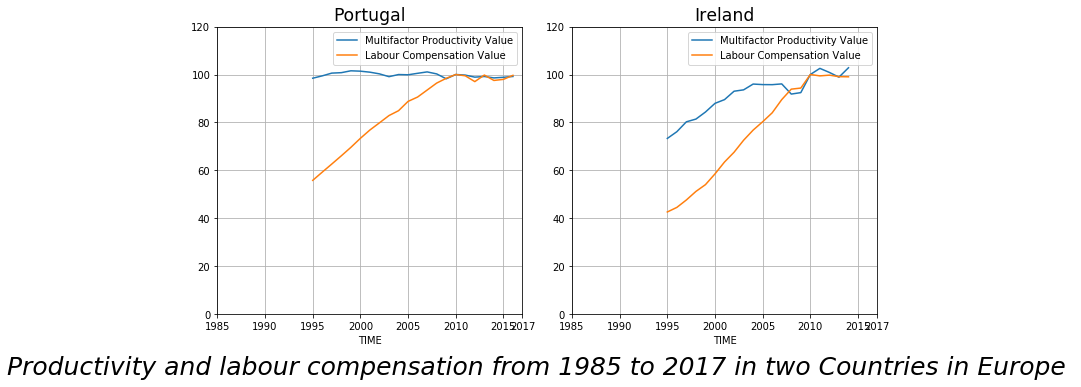

In [16]:
#Out of all european counties we have selected optimum two for further analysis 

#Two most optimal counties in terms of Multifactor Productivity Value and Labour Compensation Value in europe 
#Portugal 
#Ireland

#prt.plot(x='TIME', y=['Multifactor Productivity Value','Labour Compensation Value'],figsize=(6,6), grid=True)
#irl.plot(x='TIME', y=['Multifactor Productivity Value','Labour Compensation Value'],figsize=(6,6), grid=True)


fig = plt.figure()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1]

x=0
Countries = ["Portugal","Ireland"]

for frame in [prt,irl]:
    frame.plot(x='TIME',y=['Multifactor Productivity Value','Labour Compensation Value'], ax=axs[x], legend=True, grid=True)
    axs[x].set_title(Countries[x], fontsize='xx-large')
    axs[x].set_xticks([1985,1990,1995,2000,2005,2010,2015,2017])
    axs[x].set_yticks([0,20,40,60,80,100,120])
    
    plt.tight_layout()
    x=x+1
plt.suptitle("Productivity and labour compensation from 1985 to 2017 in two Countries in Europe ", fontsize=25, fontweight=0, color='black', style='italic', y=0)
plt.savefig('Portugal vs ireland.png')
plt.show()



<Figure size 432x288 with 0 Axes>

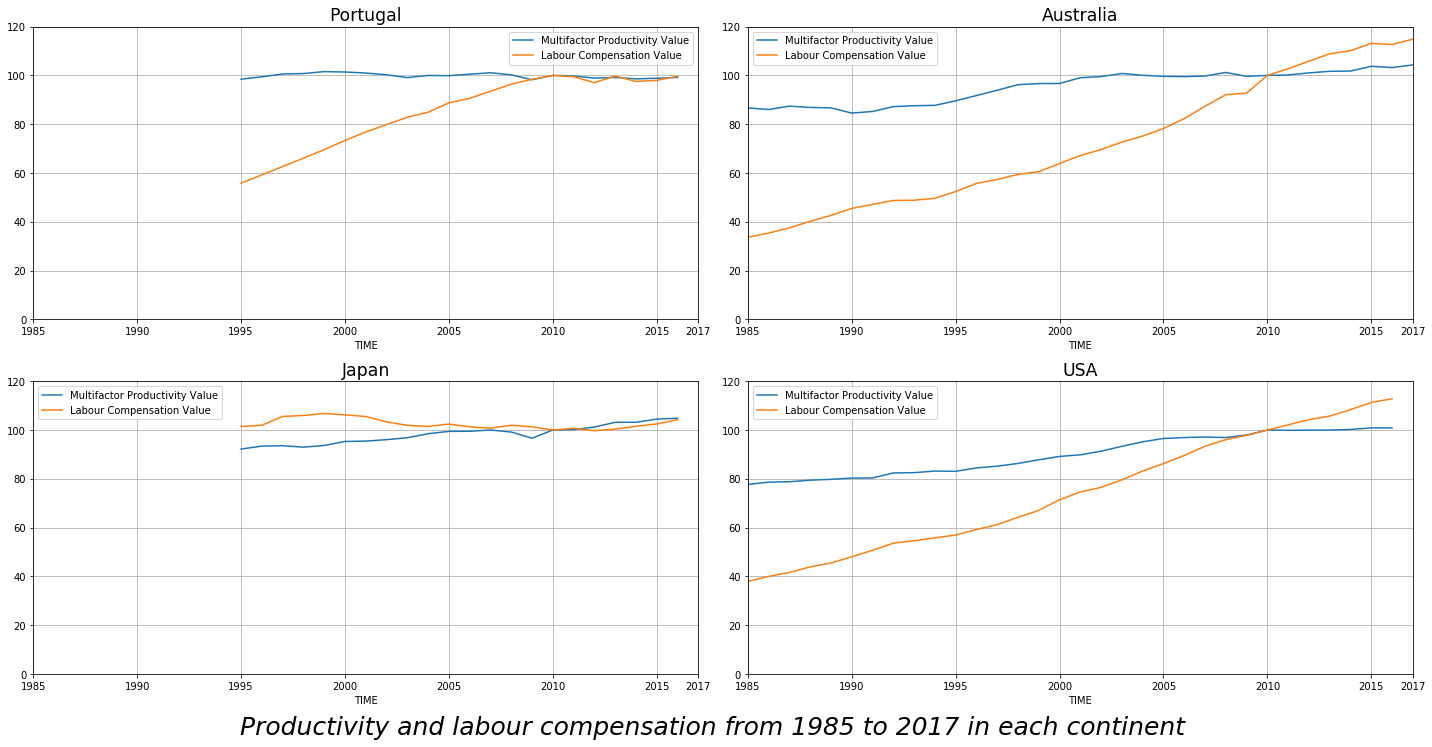

In [18]:
#We have selected one best choice from each continent for further analysis 

fig = plt.figure()

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[1]

x=0
y=0
z=0
Countries = ["Portugal","Australia","Japan","USA"]

for frame in [prt,aus,jap,us]:
    frame.plot(x='TIME',y=['Multifactor Productivity Value','Labour Compensation Value'], ax=axs[x,y], legend=True, grid=True)
    axs[x,y].set_title(Countries[z], fontsize='xx-large')
    axs[x,y].set_xticks([1985,1990,1995,2000,2005,2010,2015,2017])
    axs[x,y].set_yticks([0,20,40,60,80,100,120])
    
    plt.tight_layout()
    
    z=z+1
    y=y+1
    if y > 1:
        y=0
        x=x+1
        
plt.suptitle("Productivity and labour compensation from 1985 to 2017 in each continent ", fontsize=25, fontweight=0, color='black', style='italic', y=0)


plt.savefig('Four_countries.png')

plt.show()